In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import plotly.express as px
import seaborn as sns
import warnings
import random
import os
import shutil

from collections import Counter
from collections import defaultdict
from utils import *

In [2]:
warnings.filterwarnings("ignore")

# Pandas options
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

In [3]:
# Graphical options
plt.style.use('dark_background')
%matplotlib inline

# Exploration des métadata Factiva

In [4]:
# Importation du tableau de données
df = pd.read_excel("data/Export Factiva.xlsx", skiprows=3)
print(df.shape)

(15384, 15)


In [5]:
# Visualisation
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Filtre sujet,Source,Titre,publication_date,Nombre de mots,Lien vers l'article,Dossier,subjects,Section,Byline,subjects_sep,fichier_id
0,NaN,NaN,NaN,True,L'Humanité,L’œil de Bobika,2025-04-14,4,https://drive.google.com/file/d/1QQLMoJkwjEs4s...,articles_pdf_national,"['Content Types', 'Headline-Only Content']",NaN,NaN,"Content Types,Headline-Only Content",1QQLMoJkwjEs4s3rLJBO_XtyKy5KWeKN4
1,NaN,NaN,NaN,True,L'Humanité,Claude Ven est décédé le 4 avril à l’âge de 63...,2025-04-15,400,https://drive.google.com/file/d/1gmFNy4kFjxoNG...,articles_pdf_national,"['Political/General News', 'Labor Issues']",NaN,NaN,"Political/General News,Labor Issues",1gmFNy4kFjxoNGllm2WhIossCC8mEqLQJ
2,NaN,NaN,NaN,True,L'Humanité,L’œil de Bobika,2025-04-15,4,https://drive.google.com/file/d/1Ln1OlYc77_heh...,articles_pdf_national,"['Content Types', 'Headline-Only Content']",NaN,NaN,"Content Types,Headline-Only Content",1Ln1OlYc77_hehzHNGGYXICF8YRV-eSA2
3,NaN,NaN,NaN,True,L'Humanité,L’œil de Gros,2025-04-16,4,https://drive.google.com/file/d/1ywiXNKfil14JM...,articles_pdf_national,"['Content Types', 'Headline-Only Content']",NaN,NaN,"Content Types,Headline-Only Content",1ywiXNKfil14JMUgQbLHG-y224_DH_C2q
4,NaN,NaN,NaN,True,Libération,Réponse fraternelle à Dominique de Villepin : ...,2025-04-15,1180,https://drive.google.com/file/d/1yhxCtJGV_Y7LG...,articles_pdf_national,"['Political/General News', 'Politics/Internati...",NaN,NaN,"Political/General News,Politics/International ...",1yhxCtJGV_Y7LG-D8MCRXayAwZ90gC62G


In [6]:
# Nettoyage du tableau
sup_cols = [col for col in df.columns if col.startswith("Unnamed")]
df.drop(columns=sup_cols, inplace=True)
df

,Filtre sujet,Source,Titre,publication_date,Nombre de mots,Lien vers l'article,Dossier,subjects,Section,Byline,subjects_sep,fichier_id
0,True,L'Humanité,L’œil de Bobika,2025-04-14,4,https://drive.google.com/file/d/1QQLMoJkwjEs4s...,articles_pdf_national,"['Content Types', 'Headline-Only Content']",NaN,NaN,"Content Types,Headline-Only Content",1QQLMoJkwjEs4s3rLJBO_XtyKy5KWeKN4
1,True,L'Humanité,Claude Ven est décédé le 4 avril à l’âge de 63...,2025-04-15,400,https://drive.google.com/file/d/1gmFNy4kFjxoNG...,articles_pdf_national,"['Political/General News', 'Labor Issues']",NaN,NaN,"Political/General News,Labor Issues",1gmFNy4kFjxoNGllm2WhIossCC8mEqLQJ
2,True,L'Humanité,L’œil de Bobika,2025-04-15,4,https://drive.google.com/file/d/1Ln1OlYc77_heh...,articles_pdf_national,"['Content Types', 'Headline-Only Content']",NaN,NaN,"Content Types,Headline-Only Content",1Ln1OlYc77_hehzHNGGYXICF8YRV-eSA2
3,True,L'Humanité,L’œil de Gros,2025-04-16,4,https://drive.google.com/file/d/1ywiXNKfil14JM...,articles_pdf_national,"['Content Types', 'Headline-Only Content']",NaN,NaN,"Content Types,Headline-Only Content",1ywiXNKfil14JMUgQbLHG-y224_DH_C2q
4,True,Libération,Réponse fraternelle à Dominique de Villepin : ...,2025-04-15,1180,https://drive.google.com/file/d/1yhxCtJGV_Y7LG...,articles_pdf_national,"['Political/General News', 'Politics/Internati...",NaN,NaN,"Political/General News,Politics/International ...",1yhxCtJGV_Y7LG-D8MCRXayAwZ90gC62G
...,...,...,...,...,...,...,...,...,...,...,...,...
15379,True,Le Télégramme,Plourivo Pétanque : saison lancée avec la Coup...,2025-04-26,360,https://drive.google.com/file/d/1JOlADQ6km3HZ-...,articles_pdf_regional,"['Bowls/Petanque', 'Sports', 'Content Types', ...",NaN,]]>,"Bowls/Petanque,Sports,Content Types,Factiva Fi...",1JOlADQ6km3HZ-FlymqtAypej7gY5jc3q
15380,True,Le Télégramme,Perros-Guirec Roz Classic : le Rotary invite à...,2025-04-26,287,https://drive.google.com/file/d/1U8eSLEFbZFzCc...,articles_pdf_regional,['Political/General News'],NaN,]]>,Political/General News,1U8eSLEFbZFzCcYjfZP2ovP_OO4RoWDxp
15381,True,Aujourd'hui en France,Jean-Baptiste Isaac La France insoumise Un livre,2025-04-27,506,https://drive.google.com/file/d/140GRQ2kfnPjJ5...,articles_pdf_regional,"['Ownership Changes', 'Joint Ventures/Consorti...",_ActuD,Jean-Baptiste Isaac,"Ownership Changes,Joint Ventures/Consortia,Cor...",140GRQ2kfnPjJ56gj8oqAB9PU0c1kYmgi
15382,True,Le Télégramme,Les invitations pour Pinder ne sont pas une ar...,2025-04-27,360,https://drive.google.com/file/d/1Q5xKpu2sXQQns...,articles_pdf_regional,"['Political/General News', 'Crime/Legal Action...",NaN,Julie Magueur]]>,"Political/General News,Crime/Legal Action,Frau...",1Q5xKpu2sXQQnsX9GkQi-2gkR1e9oaosm


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15384 entries, 0 to 15383
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Filtre sujet         15384 non-null  bool          
 1   Source               15384 non-null  object        
 2   Titre                15381 non-null  object        
 3   publication_date     15381 non-null  datetime64[ns]
 4   Nombre de mots       15384 non-null  object        
 5   Lien vers l'article  15384 non-null  object        
 6   Dossier              15381 non-null  object        
 7   subjects             15384 non-null  object        
 8   Section              12395 non-null  object        
 9   Byline               9011 non-null   object        
 10  subjects_sep         14199 non-null  object        
 11  fichier_id           15381 non-null  object        
dtypes: bool(1), datetime64[ns](1), object(10)
memory usage: 1.3+ MB


In [8]:
# Formatage
df["Nombre de mots"] = pd.to_numeric(df["Nombre de mots"], errors="coerce").astype("Int64")

In [9]:
# Nombre de sources
sources = df["Source"].unique()
n_sources = df["Source"].nunique()
print(f"Nombre de sources : {n_sources}:\n {sources.tolist()}")

Nombre de sources : 23:
 ["L'Humanité", 'Libération', 'M, le magazine du Monde', 'Le Figaro Premium', 'LePoint.fr', 'Le Figaro Magazine', 'Le Monde', 'La Croix', 'Le Point', "L'Humanité Dimanche", 'Le Figaro', '          Rédactrice en chef de Terre sainte Magazine "', '          Rédacteur en chef assomptionniste à La Croix "', '          (Crédit photo : Franck Ferville) "', 'Les Echos', 'Les Echos.fr', 'Le Parisien', "Aujourd'hui en France", 'Sud Ouest', 'Le Télégramme', 'Le HuffPost', 'La Montagne', 'Globenewswire']


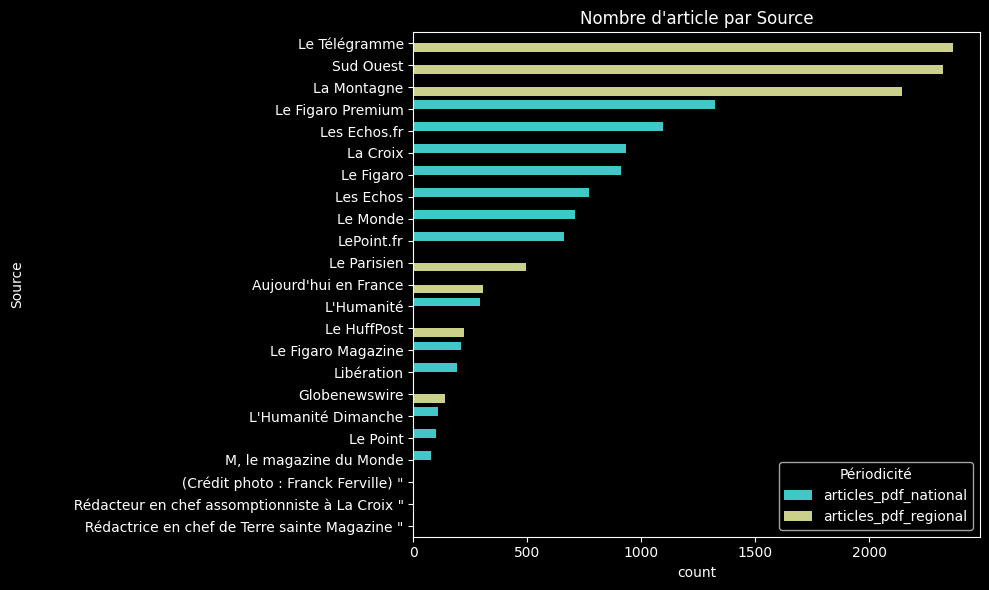

In [10]:
# Représentativité des sources
order = df['Source'].value_counts().index

# Tracer le graphique
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Source', hue="Dossier", order=order, palette="rainbow")

plt.title("Nombre d'article par Source")
plt.legend(title="Périodicité", loc='lower right')
plt.tight_layout()
plt.show()

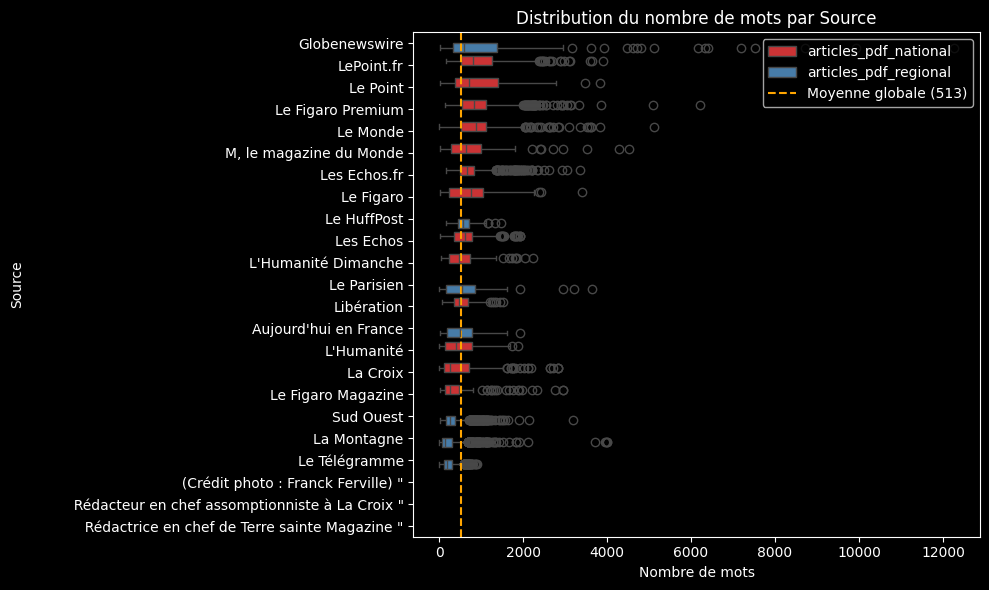

In [11]:
# Ordre des sources par moyenne décroissante
order = df.groupby("Source")["Nombre de mots"].mean().sort_values(ascending=False).index

# Calcul de la Moyenne globale
moyenne_globale = df["Nombre de mots"].mean()

# Boxplot
plt.figure(figsize=(10, 6))
plot = sns.boxplot(data=df, y="Source", x="Nombre de mots", hue="Dossier", order=order, palette="Set1")

# Ligne verticale pour la moyenne
ligne_moyenne = plt.axvline(x=moyenne_globale, color='orange', linestyle='--')

# Fusionner les légendes : Dossier + Moyenne globale
handles, labels = plot.get_legend_handles_labels()
handles.append(ligne_moyenne)
labels.append(f"Moyenne globale ({int(moyenne_globale)})")

# Ajustement de la légende
plt.legend(handles=handles, labels=labels, loc="upper right")
plt.title("Distribution du nombre de mots par Source")
plt.tight_layout()
plt.show()


<Axes: xlabel='Nombre de mots', ylabel='Count'>

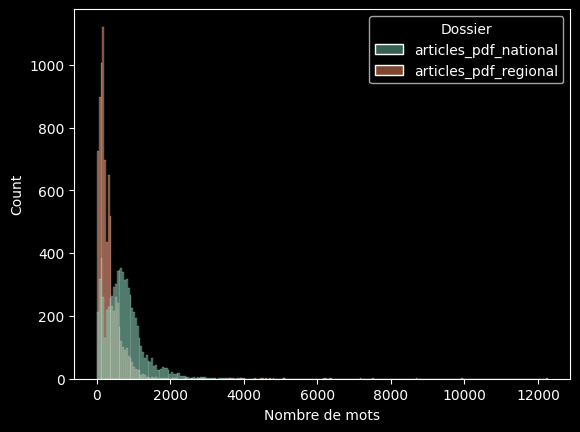

In [12]:
# Représentation du nombre de mots
sns.histplot(df, x="Nombre de mots", hue="Dossier", palette="Set2")

Obtenir le top des catégories

In [13]:
# Étape 1 : aplatir toutes les catégories
all_categories = df['subjects_sep'].dropna().apply(lambda x: [cat.strip() for cat in x.split(',')])
all_categories.head()

0               [Content Types, Headline-Only Content]
1               [Political/General News, Labor Issues]
2               [Content Types, Headline-Only Content]
3               [Content Types, Headline-Only Content]
4    [Political/General News, Politics/Internationa...
Name: subjects_sep, dtype: object

In [14]:
# Étape 2 : compter avec Counter
flat_list = [cat for sublist in all_categories for cat in sublist]
counter = Counter(flat_list)
counter

Counter({'Political/General News': 11539,
         'Content Types': 4669,
         'Factiva Filters': 4016,
         'Politics/International Relations': 2853,
         '[unknown:nfce]': 2767,
         'Domestic Politics': 2623,
         'Routine General News': 2504,
         'Society/Community': 2368,
         'Arts/Entertainment': 2144,
         'Sports': 2067,
         'Corporate/Industrial News': 1408,
         'Selection of Top Stories/Trends/Analysis': 1067,
         'Suggested Reading – Industry News': 1067,
         'Living/Lifestyle': 1002,
         'Religion': 958,
         'Economic News': 869,
         '[unknown:nfcpin]': 827,
         'Crime/Legal Action': 684,
         '[unknown:nfcpex]': 667,
         'National/Public Security': 602,
         'Risk News': 552,
         'Health': 552,
         'International Relations': 532,
         'Movies': 514,
         '[unknown:niwe]': 476,
         'Education': 473,
         'Soccer': 453,
         'Armed Forces': 451,
         'Mus

In [15]:
# Étape 3 : transformer en DataFrame trié
df_counts = pd.DataFrame(counter.items(), columns=['categorie', 'nb_mentions'])
df_counts = df_counts.sort_values(by='nb_mentions', ascending=False).reset_index(drop=True)

df_counts.head(200)

,categorie,nb_mentions
0,Political/General News,11539
1,Content Types,4669
2,Factiva Filters,4016
3,Politics/International Relations,2853
4,[unknown:nfce],2767
5,Domestic Politics,2623
6,Routine General News,2504
7,Society/Community,2368
8,Arts/Entertainment,2144
9,Sports,2067


# Sélection par mots clés avec les mots clés de l'OME

In [16]:
# Importation des données
df = pd.read_excel("data/articles_dictionnaire_mots_cles_OME_02_07_15h30.xlsx")
print(df.shape)
df.head()

(15381, 48)


,source_name,title,publication_date,subject_codes,word_count,section,an,body,snippet,Dossier,nom_fichier,text,adaptation_climatique_solutions,adaptation_climatique_solutions_indirectes,attenuation_climatique_solutions,attenuation_climatique_solutions_indirectes,biodiversite_causes,biodiversite_causes_indirectes,biodiversite_concepts_generaux,biodiversite_concepts_generaux_indirectes,biodiversite_consequences,biodiversite_consequences_indirectes,biodiversite_solutions,biodiversite_solutions_indirectes,changement_climatique_causes,changement_climatique_causes_indirectes,changement_climatique_consequences,changement_climatique_consequences_indirectes,changement_climatique_constat,changement_climatique_constat_indirectes,ressources,ressources_indirectes,ressources_solutions,ressources_solutions_indirectes,matched_keywords,all_matched_keywords,climat_total_keywords,biodiversite_total_keywords,ressources_total_keywords,keywords_summary,climat_not_HRFP_total_keywords,climat_HRFP_total_keywords,biodiversite_not_HRFP_total_keywords,biodiversite_HRFP_total_keywords,ressources_not_HRFP_total_keywords,ressources_HRFP_total_keywords,HRFP_total_keywords,not_HRFP_total_keywords
0,Aujourd'hui en France,En immersion totale,2025-04-21,",gcat,gent,gmovie,",216,_Loisirs,AUFRA00020250421el4l00001,21 h 10 (1 h 45) Film de guerre de Christopher...,En immersion totale\n\n« Dunkerque »,articles_pdf_regional,AujourdhuienFrance_1745199231000_1005,En immersion totale. 21 h 10 (1 h 45) Film de ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,[],0,0,0,{},0,0,0,0,0,0,0,0
1,Aujourd'hui en France,APAISEMENTiValls se refait une santé à gauche,2025-04-21,",gcat,gpir,gpol,",532,_Politique,AUFRA00020250421el4l00002,"Le 29 avril,Manuel Valls se rendra de nouveau ...",APAISEMENTiValls se refait une santé à gauche\...,articles_pdf_regional,AujourdhuienFrance_1745199231000_17,APAISEMENTiValls se refait une santé à gauche....,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,5,0,0,0,0,"mer, océan, écologiste","['mer', 'océan', 'mer', 'mer', 'écologiste']",5,5,0,{'écologiste': {'categories': ['changement_cli...,0,5,0,5,0,0,5,0
2,Aujourd'hui en France,"Le printemps flamboyant de Ben Caillous, artis...",2025-04-21,",gart,gcat,gedu,gent,gscho,",565,_24 Heures en Region,AUFRA00020250421el4l00003,Sur le parvis des écoles élémentaires de Canoh...,"Le printemps flamboyant de Ben Caillous, artis...",articles_pdf_regional,AujourdhuienFrance_1745199231000_1000,"Le printemps flamboyant de Ben Caillous, artis...",0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"jardin, mer","['jardin', 'mer']",2,2,0,{'jardin': {'categories': ['adaptation_climati...,0,2,0,2,0,0,2,0
3,Aujourd'hui en France,"Carlo Acutis, l’ado devenu saint 2.0",2025-04-21,",gcancr,gcat,gcom,ghea,gleuk,gmed,grel,",1254,_Le Fait du jour,AUFRA00020250421el4l00004,"Il semble se reposer, paisiblement allongé, le...","Carlo Acutis, l’ado devenu saint 2.0\n\nCe « c...",articles_pdf_regional,AujourdhuienFrance_1745199231000_7952,"Carlo Acutis, l’ado devenu saint 2.0. Il sembl...",0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,3,0,0,1,0,0,"car, milieu, norme, vivant","['vivant', 'milieu', 'norme', 'car', 'car']",4,2,1,{'car': {'categories': ['changement_climatique...,3,1,0,2,0,1,2,3
4,Aujourd'hui en France,CLASSEMENT Pts J. G. N. P. p.,2025-04-21,",gspo,ncat,nfact,nfce,nrgn,",34,_Sports,AUFRA00020250421el4l00005,PtsJ.G.N.P.p.c.Dif1PSG772924508227552Marseille...,CLASSEMENT Pts J. G. N. P. p.\n\nCLASSEMENT,articles_pdf_regional,AujourdhuienFrance_1745199231000_998,CLASSEMENT Pts J. G. N. P. p.. PtsJ.G.N.P.p.c....,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,[],0,0,0,{},0,0,0,0,0,0,0,0


In [17]:
# Nom des colonnes
df.columns

Index(['source_name', 'title', 'publication_date', 'subject_codes',
       'word_count', 'section', 'an', 'body', 'snippet', 'Dossier',
       'nom_fichier', 'text', 'adaptation_climatique_solutions',
       'adaptation_climatique_solutions_indirectes',
       'attenuation_climatique_solutions',
       'attenuation_climatique_solutions_indirectes', 'biodiversite_causes',
       'biodiversite_causes_indirectes', 'biodiversite_concepts_generaux',
       'biodiversite_concepts_generaux_indirectes',
       'biodiversite_consequences', 'biodiversite_consequences_indirectes',
       'biodiversite_solutions', 'biodiversite_solutions_indirectes',
       'changement_climatique_causes',
       'changement_climatique_causes_indirectes',
       'changement_climatique_consequences',
       'changement_climatique_consequences_indirectes',
       'changement_climatique_constat',
       'changement_climatique_constat_indirectes', 'ressources',
       'ressources_indirectes', 'ressources_solutions',
  

In [18]:
# Création de la colonne changement_climatique_solutions
df["changement_climatique_solutions"] = df["adaptation_climatique_solutions"] + df["attenuation_climatique_solutions"]

## Vérification de la cohérence des données

In [19]:
# Chaine causale 
climat_cols = [
    "climat_not_HRFP_total_keywords", 
    "changement_climatique_solutions", 'changement_climatique_causes', 
    'changement_climatique_consequences', 'changement_climatique_constat']
biodiv_cols = [
    "biodiversite_not_HRFP_total_keywords",
    'biodiversite_causes', 'biodiversite_concepts_generaux',
    'biodiversite_consequences', 'biodiversite_solutions'
]
resources_cols = [
    "ressources_not_HRFP_total_keywords",
    'ressources', 'ressources_solutions' 
]

**Climat**

In [20]:
# Verification que tout ce qui est rangé dans l'enjeu se trouve bien dans une des thématiques
climat_df = df[climat_cols]
verif_coherence(climat_df, "climat_not_HRFP_total_keywords")

Condition 1 (climat_not_HRFP_total_keywords NaN ⇒ tout le reste aussi NaN) : True
Condition 2 (climat_not_HRFP_total_keywords non NaN ⇒ au moins une autre valeur) : True
✅ Données cohérentes.


**Biodiversité**

In [21]:
# Verification que tout ce qui est rangé dans l'enjeu se trouve bien dans une des thématiques
biodiv_df = df[biodiv_cols]
verif_coherence(biodiv_df, "biodiversite_not_HRFP_total_keywords")

Condition 1 (biodiversite_not_HRFP_total_keywords NaN ⇒ tout le reste aussi NaN) : True
Condition 2 (biodiversite_not_HRFP_total_keywords non NaN ⇒ au moins une autre valeur) : True
✅ Données cohérentes.


**Ressources**

In [22]:
# Verification que tout ce qui est rangé dans l'enjeu se trouve bien dans une des thématiques
ressources_df = df[resources_cols]
verif_coherence(ressources_df, "ressources_not_HRFP_total_keywords")

Condition 1 (ressources_not_HRFP_total_keywords NaN ⇒ tout le reste aussi NaN) : True
Condition 2 (ressources_not_HRFP_total_keywords non NaN ⇒ au moins une autre valeur) : True
✅ Données cohérentes.


## Séléction du seuil du nombre de mots clés à prendre en compte pour considérer que l'on parle de l'enjeu

<Axes: ylabel='Count'>

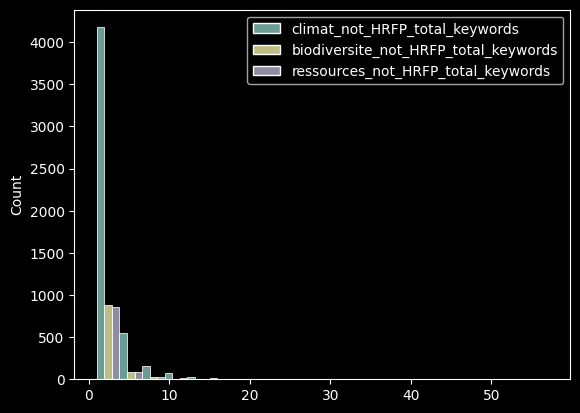

In [23]:
# Visualisation des données
enjeu_df = df[["climat_not_HRFP_total_keywords", "biodiversite_not_HRFP_total_keywords", "ressources_not_HRFP_total_keywords"]]
enjeu_df = enjeu_df.replace(0, np.nan)
sns.histplot(enjeu_df, multiple="dodge", bins=20)

In [24]:
# Seuil pour considérer qu'on a suffisamment de mots clés pour dire qu'on parle de la crise
keyword_thresh = 3

In [25]:
# Création de nouvelles colonnes enjeu
df["climat"] = (df["climat_not_HRFP_total_keywords"] > keyword_thresh).astype(int)
df["biodiversité"] = (df["biodiversite_not_HRFP_total_keywords"] > keyword_thresh).astype(int)
df["exploit_ressources"] = (df["ressources_not_HRFP_total_keywords"] > keyword_thresh).astype(int)

In [26]:
# Création de nouvelles colonnes enjeu
climat_df["climat"] = (climat_df["climat_not_HRFP_total_keywords"] > keyword_thresh).astype(int)
biodiv_df["biodiversité"] = (biodiv_df["biodiversite_not_HRFP_total_keywords"] > keyword_thresh).astype(int)
ressources_df["exploit_ressources"] = (ressources_df["ressources_not_HRFP_total_keywords"] > keyword_thresh).astype(int)

Text(0, 0.5, '')

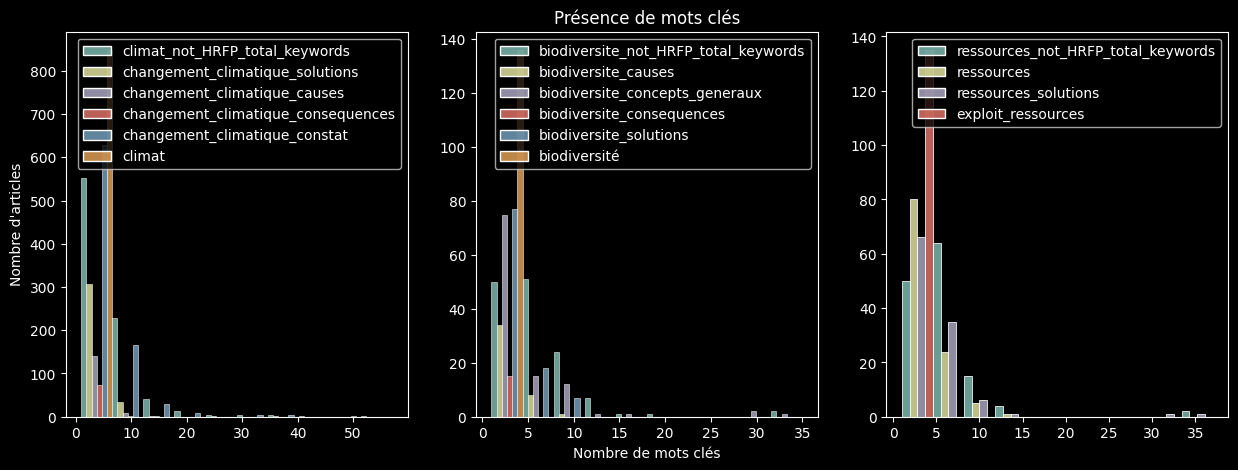

In [27]:
# Représentations graphiques
fig, ax = plt.subplots(1, 3, figsize=(15, 5)) 
sns.histplot(climat_df[climat_df["climat"]==1].replace(0, np.nan), multiple="dodge", bins=10, ax=ax[0])
sns.histplot(biodiv_df[biodiv_df["biodiversité"]==1].replace(0, np.nan), multiple="dodge", bins=10, ax=ax[1])
sns.histplot(ressources_df[ressources_df["exploit_ressources"]==1].replace(0, np.nan), multiple="dodge", bins=10, ax=ax[2], legend="best")

# Ajouter manuellement le titre et les labels
ax[1].set_title("Présence de mots clés")
ax[1].set_xlabel("Nombre de mots clés")
ax[0].set_ylabel("Nombre d'articles")
ax[1].set_ylabel("")
ax[2].set_ylabel("")

## Comptage du nombre d'articles concernés par les enjeux

In [28]:
# Climat
climat_summary = climat_df.sum().reset_index()
climat_summary.columns=["Enjeu-Thématique", "Nombre d'articles"]
climat_summary

,Enjeu-Thématique,Nombre d'articles
0,climat_not_HRFP_total_keywords,12290
1,changement_climatique_solutions,1602
2,changement_climatique_causes,419
3,changement_climatique_consequences,247
4,changement_climatique_constat,10953
5,climat,848


In [29]:
# Biodiv
biodiv_summary = biodiv_df.sum().reset_index()
biodiv_summary.columns=["Enjeu-Thématique", "Nombre d'articles"]
biodiv_summary

,Enjeu-Thématique,Nombre d'articles
0,biodiversite_not_HRFP_total_keywords,2140
1,biodiversite_causes,310
2,biodiversite_concepts_generaux,966
3,biodiversite_consequences,34
4,biodiversite_solutions,913
5,biodiversité,136


In [30]:
# Climat
ressources_summary = ressources_df.sum().reset_index()
ressources_summary.columns=["Enjeu-Thématique", "Nombre d'articles"]
ressources_summary

,Enjeu-Thématique,Nombre d'articles
0,ressources_not_HRFP_total_keywords,2112
1,ressources,1057
2,ressources_solutions,1093
3,exploit_ressources,135


In [31]:
# Nombre d'articles par enjeu
nb_art_enjeu = 7

In [32]:
print(f"Nous décidons, dans un premier temps, de choisir {nb_art_enjeu} articles par enjeu (contenant plus de {keyword_thresh} mots clés) et de les répartir au mieux entre thématiques") 

Nous décidons, dans un premier temps, de choisir 7 articles par enjeu (contenant plus de 3 mots clés) et de les répartir au mieux entre thématiques


In [33]:
# Liste des rédactions
df.source_name.unique()

array(["Aujourd'hui en France", 'Les Echos.fr', 'Les Echos', 'Le Figaro',
       'Le Figaro Magazine', 'Le Figaro Premium', 'Globenewswire',
       "L'Humanité", "L'Humanité Dimanche", 'La Croix', 'La Montagne',
       'Le HuffPost', 'Le Monde', 'Le Parisien', 'Libération', 'Le Point',
       'M, le magazine du Monde', 'LePoint.fr', 'Sud Ouest',
       'Le Télégramme'], dtype=object)

In [34]:
# Suppression de certains journaux => les echos et echos.fr*
redact_to_remove= ["Les Echos.fr", "Les Echos"]
df = df[~df["source_name"].isin(redact_to_remove)]
df.source_name.value_counts()

source_name
Le Télégramme              2368
Sud Ouest                  2326
La Montagne                2143
Le Figaro Premium          1323
La Croix                    934
Le Figaro                   909
Le Monde                    707
LePoint.fr                  661
Le Parisien                 495
Aujourd'hui en France       307
L'Humanité                  291
Le HuffPost                 221
Le Figaro Magazine          210
Libération                  193
Globenewswire               140
L'Humanité Dimanche         108
Le Point                    100
M, le magazine du Monde      79
Name: count, dtype: int64

# Sélection des articles

In [35]:
# Nombre d'articles par enjeu
nb_art_enjeu = 8

In [36]:
# Est ce que l'on sélectionne des articles sans enjeu
sans_enjeu = False

In [37]:
# 1. Définir les colonnes associées à chaque type
chaine_causale = {
    "climat": ["changement_climatique_constat", "changement_climatique_causes",
               "changement_climatique_consequences","changement_climatique_solutions"],
    "biodiversité": ["biodiversite_concepts_generaux", "biodiversite_causes", 
                     "biodiversite_consequences", "biodiversite_solutions"],
    "ressources": ["ressources", "ressources_solutions"]
}

enjeux = {
    "climat": "climat",
    "biodiversité": "biodiversité",
    "ressources": "exploit_ressources"
}

In [38]:
df.Dossier.unique()

array(['articles_pdf_regional', 'articles_pdf_national'], dtype=object)

In [39]:
# Ratio des articles nationaux par rapport à régionaux
ratio_nat_reg = 0.33  # ex : 33% national, 67% régional

In [40]:
# Dossiers à cibler
dossier_nat = "articles_pdf_national"
dossier_reg = "articles_pdf_regional"

In [41]:
tirages_par_enjeu = selection_articles_enjeu(df, enjeux, chaine_causale, nb_art_enjeu=8, ratio_nat_reg=0.33)

Nombre total de lignes tirées : 24

Répartition par Dossier :
Dossier
articles_pdf_regional    14
articles_pdf_national    10
Name: count, dtype: int64


In [42]:
# Selection des articles sans enjeu
tirages_sans_enjeu = selection_articles_sans_enjeu(df, keyword_thresh, nb_art_enjeu)

Nombre total de lignes 'sans enjeu' tirées : 8


In [43]:
# Regrouper tous les tirages
if sans_enjeu:
    tirages_final = pd.concat([tirages_par_enjeu] + [tirages_sans_enjeu]).reset_index(drop=True)
else:
    tirages_final = pd.concat([tirages_par_enjeu]).reset_index(drop=True)

In [44]:
# Vérification de la répartition des journaux
tirages_final.groupby(["enjeu", "type", "Dossier"]).size().reset_index()

,enjeu,type,Dossier,0
0,biodiversité,biodiversite_causes,articles_pdf_national,1
1,biodiversité,biodiversite_causes,articles_pdf_regional,1
2,biodiversité,biodiversite_concepts_generaux,articles_pdf_national,1
3,biodiversité,biodiversite_concepts_generaux,articles_pdf_regional,1
4,biodiversité,biodiversite_consequences,articles_pdf_national,1
5,biodiversité,biodiversite_consequences,articles_pdf_regional,1
6,biodiversité,biodiversite_solutions,articles_pdf_national,1
7,biodiversité,biodiversite_solutions,articles_pdf_regional,1
8,climat,changement_climatique_causes,articles_pdf_national,1
9,climat,changement_climatique_causes,articles_pdf_regional,1


In [45]:
selection = tirages_final[[
    'source_name', 'title', 'publication_date', 
    'word_count','Dossier',
    'nom_fichier',
    'changement_climatique_constat',
    'changement_climatique_causes',
    'changement_climatique_consequences',
    'changement_climatique_solutions',
    'biodiversite_concepts_generaux',
    'biodiversite_causes',
    'biodiversite_consequences',
    'biodiversite_solutions', 
    'ressources', 'ressources_solutions',
    'climat_not_HRFP_total_keywords', 
    'biodiversite_not_HRFP_total_keywords',
    'ressources_not_HRFP_total_keywords', 
    'climat', 'biodiversité',
    'exploit_ressources', 'enjeu', 'type'
]]

In [46]:
print("Selection :", selection.shape)
selection.head()

Selection : (24, 24)


,source_name,title,publication_date,word_count,Dossier,nom_fichier,changement_climatique_constat,changement_climatique_causes,changement_climatique_consequences,changement_climatique_solutions,biodiversite_concepts_generaux,biodiversite_causes,biodiversite_consequences,biodiversite_solutions,ressources,ressources_solutions,climat_not_HRFP_total_keywords,biodiversite_not_HRFP_total_keywords,ressources_not_HRFP_total_keywords,climat,biodiversité,exploit_ressources,enjeu,type
0,LePoint.fr,Quelles sont les solutions pour défiscaliser e...,2025-04-17 00:00:00,1149,articles_pdf_national,LePointfr_1744862703000_613,4,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,climat,changement_climatique_constat
1,Globenewswire,Planisware obtient la note B du CDP récompensa...,2025-04-22 16:00:00,827,articles_pdf_regional,Globenewswire_1745337604000_283,6,1,0,5,0,0,0,1,1,5,12,1,6,1,0,1,climat,changement_climatique_constat
2,Le Figaro,"La chute des cours des hydrocarbures, un frein...",2025-04-16 00:00:00,659,articles_pdf_national,LeFigaro_1744772485000_1907,10,4,0,11,0,0,0,0,1,2,19,0,3,1,0,0,climat,changement_climatique_causes
3,Globenewswire,"Michelin : Chiffre d’affaires en baisse de 1,9...",2025-04-24 15:45:00,4710,articles_pdf_regional,Globenewswire_1745509530000_662,21,1,0,7,0,1,0,2,3,3,29,3,6,1,0,1,climat,changement_climatique_causes
4,LePoint.fr,Pourquoi le Groenland est l'objet des plus gra...,2025-04-16 00:00:00,2641,articles_pdf_national,LePointfr_1744820405000_2360,8,0,1,0,1,3,0,0,4,0,9,4,4,1,1,1,climat,changement_climatique_consequences


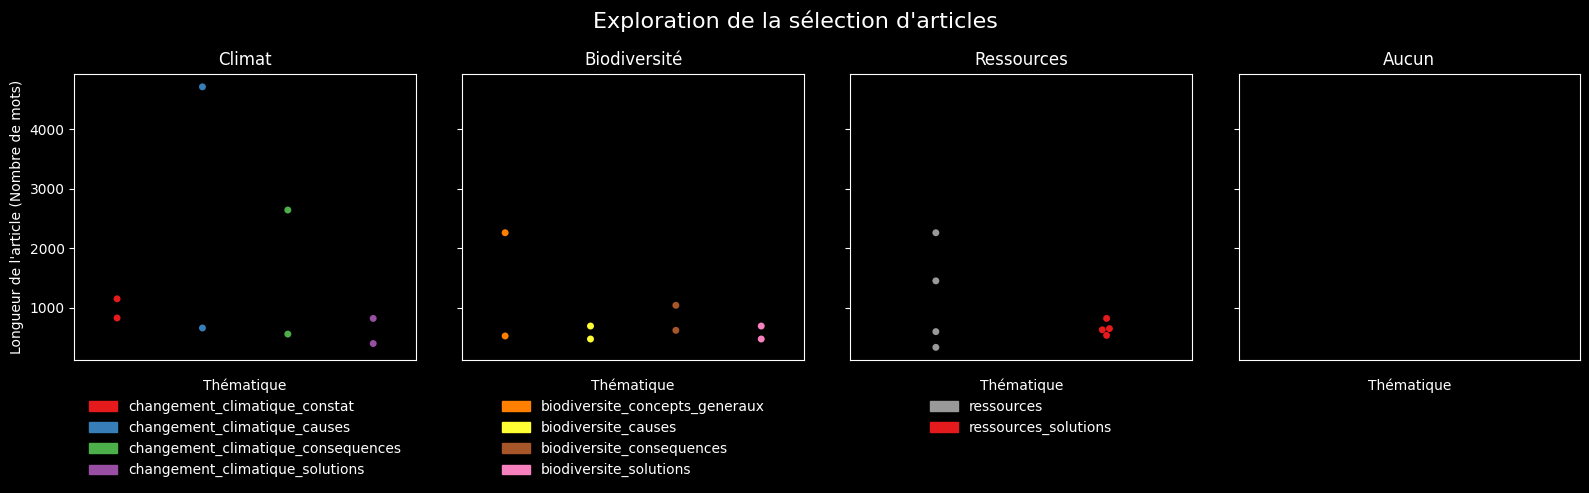

In [47]:
visualize_selection(selection, plot='word_counts')

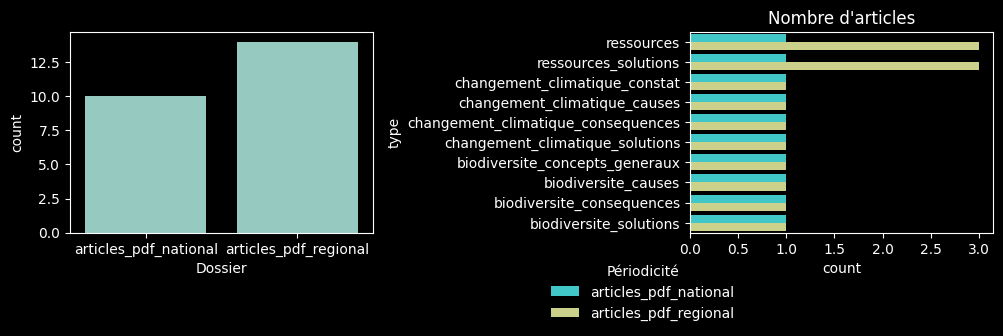

In [48]:
visualize_selection(selection, plot='source_type')

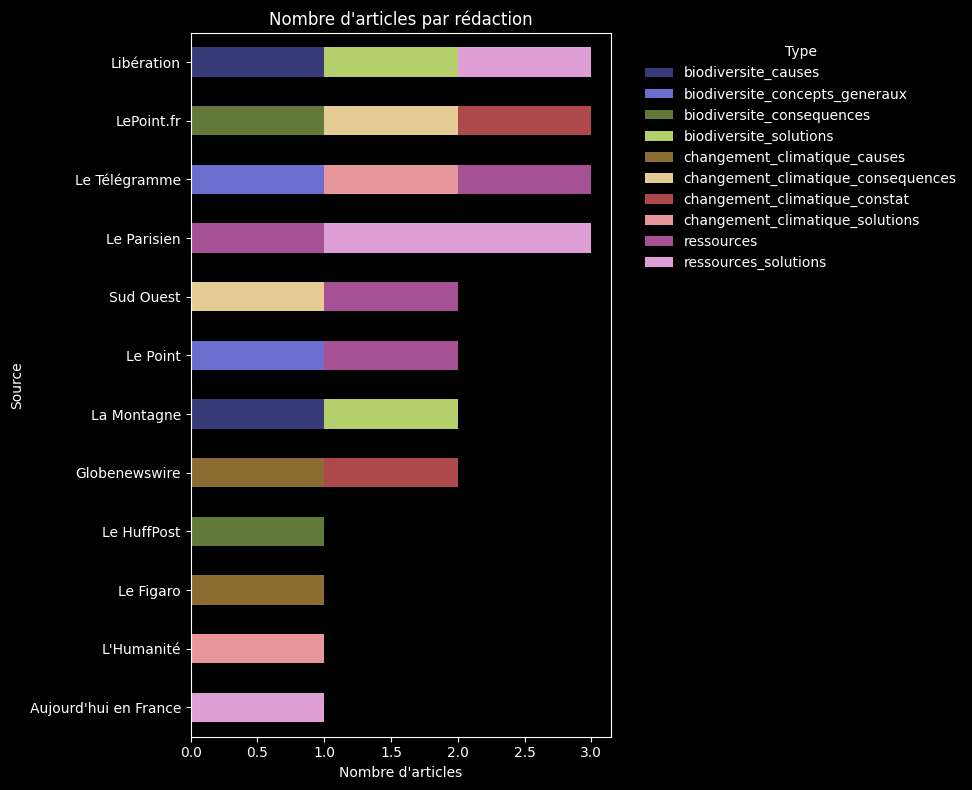

In [49]:
visualize_selection(selection, plot='source_name')

In [50]:
selection.nom_fichier.unique()

array(['LePointfr_1744862703000_613', 'Globenewswire_1745337604000_283',
       'LeFigaro_1744772485000_1907', 'Globenewswire_1745509530000_662',
       'LePointfr_1744820405000_2360', 'SudOuest_1745208282000_1215',
       'LHumanité_1745348674000_1706', 'LeTélégramme_1745473991000_5442',
       'LePoint_1744884280000_3602', 'LeTélégramme_1745654087000_896',
       'Libération_1745578061000_156', 'LaMontagne_1745532298000_5906',
       'LePointfr_1745384703000_4434', 'LeHuffPost_1745524807000_693',
       'LeTélégramme_1745387656000_394', 'LeParisien_1745285501000_2191',
       'SudOuest_1745469056000_5319', 'Libération_1745578060000_155',
       'LeParisien_1745285501000_2190', 'LeParisien_1745285431000_148',
       'AujourdhuienFrance_1745371900000_322'], dtype=object)

# Attribution des articles aux veilleurs

In [51]:
attributions_df = attribute_articles_veilleurs(selection, n_article_par_veilleur=10, lecteurs_par_article=5)

Avec maximum 10 articles par veilleurs, il faut 13 veilleurs.
✅ Attribution réussie.


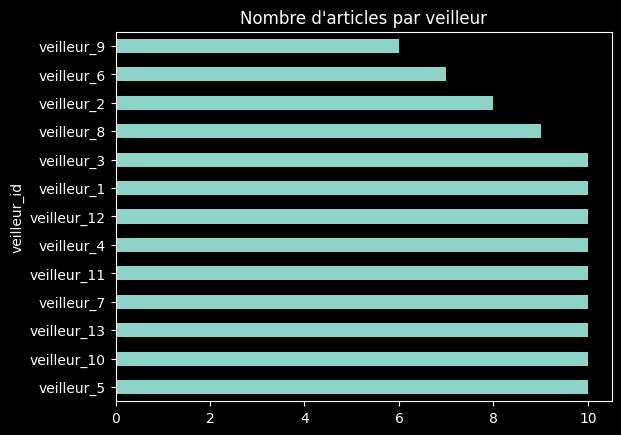

In [52]:
check_attribution(attributions_df)

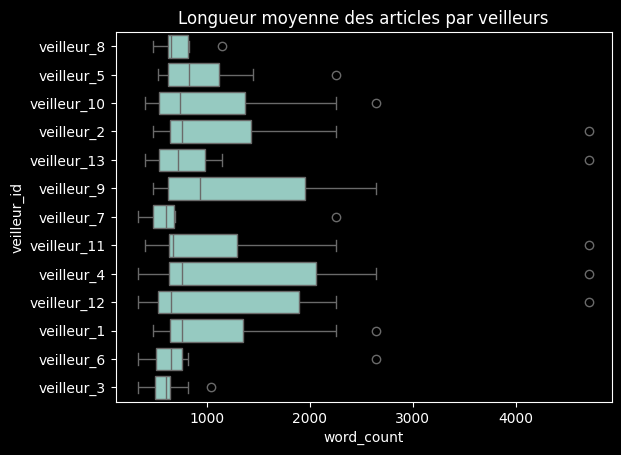

In [53]:
check_attribution(attributions_df, plot="boxplot_veilleurs")

In [54]:
# Tri var veilleur
attributions_df_sorted = attributions_df.sort_values(by="veilleur_id").reset_index(drop=True)

In [55]:
# Sauvegarde en csv
attributions_df_sorted[["veilleur_id", "title", "nom_fichier"]].to_csv("attribution_articles_veilleurs_08072025.csv")

In [56]:
# Création des dossiers par veilleurs
import os
import shutil

raw_file_path = "C:/Users/aurel/Documents/Pro/ClimatMedias/Methodo_presse/20260612_Factiva_extract"
# Répertoire de destination
output_base_dir = "articles_veilleurs"
os.makedirs(output_base_dir, exist_ok=True)

# Copier les fichiers pour chaque veilleur
for veilleur_id, group in attributions_df.groupby("veilleur_id"):
    veilleur_dir = os.path.join(output_base_dir, veilleur_id)
    os.makedirs(veilleur_dir, exist_ok=True)

    for _, row in group.iterrows():
        source_path = str(row["nom_fichier"]+".pdf")
        if os.path.exists(os.path.join(raw_file_path, source_path)):
            shutil.copy(os.path.join(raw_file_path, source_path), veilleur_dir)
        else:
            print(f"⚠️ Fichier non trouvé : {source_path}")

# Création du pack premium d'articles

## Retrait des articles déja choisis

In [57]:
# Retrait des articles déja choisis
df_reduit = df[~df["nom_fichier"].isin(selection.nom_fichier.unique())]

## Définition des paramètres de choix

In [58]:
# Nombre d'articles par enjeu
nb_art_enjeu = 8

In [59]:
# Tirage des articles avec enjeux
tirage_premium_enjeux = selection_articles_enjeu(df_reduit, enjeux, chaine_causale, nb_art_enjeu=8, ratio_nat_reg=0.33)

Nombre total de lignes tirées : 24

Répartition par Dossier :
Dossier
articles_pdf_regional    13
articles_pdf_national    11
Name: count, dtype: int64


In [60]:
# Selection des articles sans enjeu
tirages_premium_sans_enjeu = selection_articles_sans_enjeu(df_reduit, keyword_thresh, nb_art_enjeu)

Nombre total de lignes 'sans enjeu' tirées : 8


In [61]:
# Regrouper tous les tirages
if sans_enjeu:
    tirages_final_premium = pd.concat([tirage_premium_enjeux] + [tirages_premium_sans_enjeu]).reset_index(drop=True)
else:
    tirages_final_premium = pd.concat([tirage_premium_enjeux]).reset_index(drop=True)

In [62]:
selection_premium = tirages_final_premium[[
    'source_name', 'title', 'publication_date', 
    'word_count','Dossier',
    'nom_fichier',
    'changement_climatique_constat',
    'changement_climatique_causes',
    'changement_climatique_consequences',
    'changement_climatique_solutions',
    'biodiversite_concepts_generaux',
    'biodiversite_causes',
    'biodiversite_consequences',
    'biodiversite_solutions', 
    'ressources', 'ressources_solutions',
    'climat_not_HRFP_total_keywords', 
    'biodiversite_not_HRFP_total_keywords',
    'ressources_not_HRFP_total_keywords', 
    'climat', 'biodiversité',
    'exploit_ressources', 'enjeu', 'type'
]]

### Verification de l'équilibre des sources

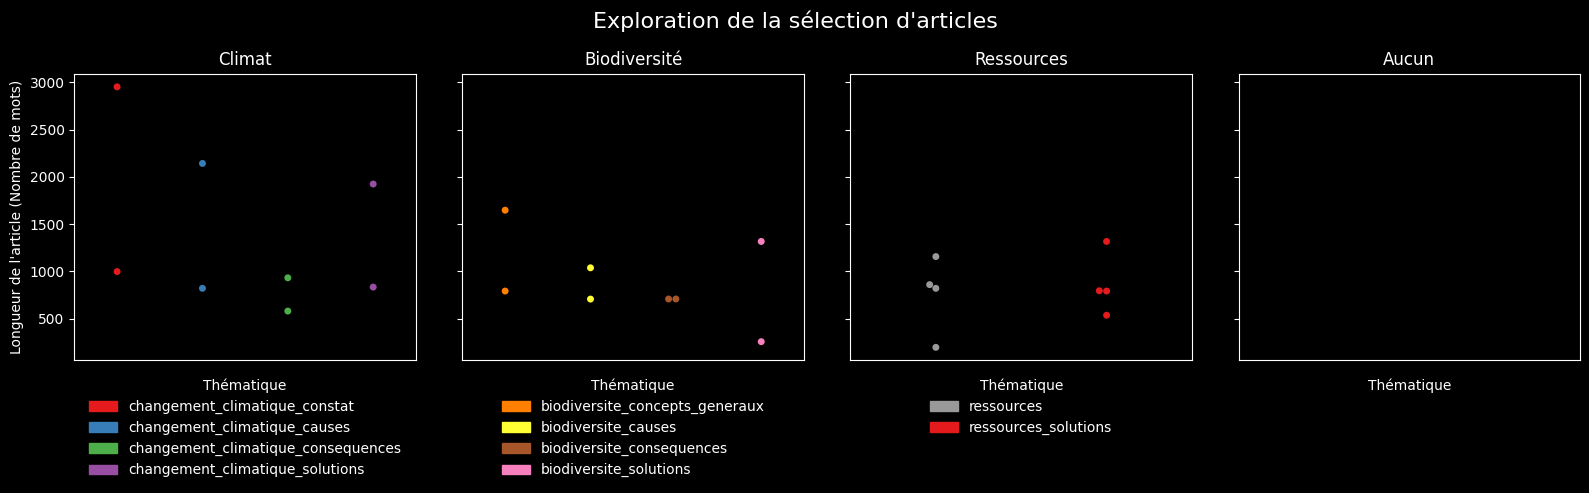

In [63]:
visualize_selection(selection_premium, plot='word_counts')

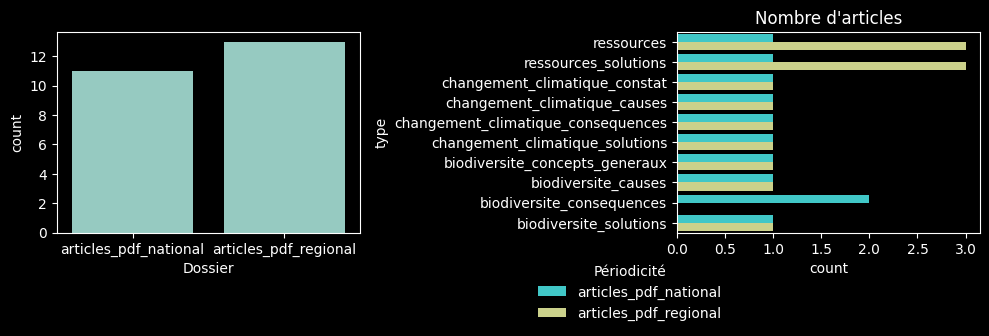

In [64]:
visualize_selection(selection_premium, plot='source_type')

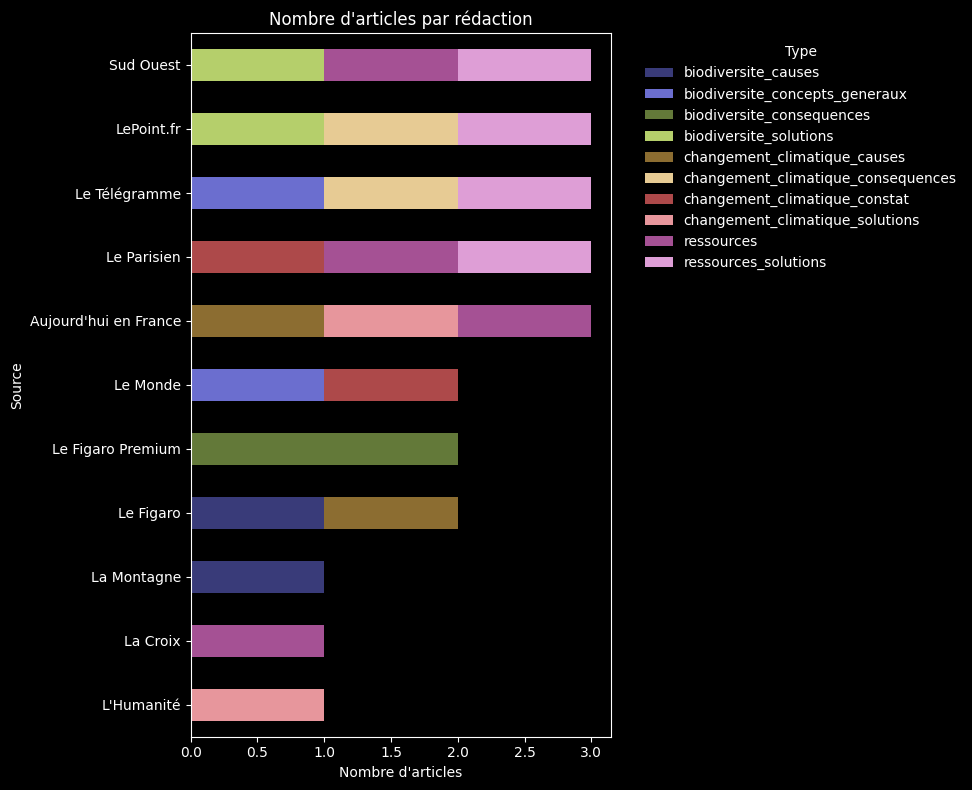

In [65]:
visualize_selection(selection_premium, plot='source_name')

## Attribution aux veilleurs

In [66]:
attributions_df_premium = attribute_articles_veilleurs(selection_premium, n_article_par_veilleur=10, lecteurs_par_article=5)

Avec maximum 10 articles par veilleurs, il faut 13 veilleurs.
✅ Attribution réussie.


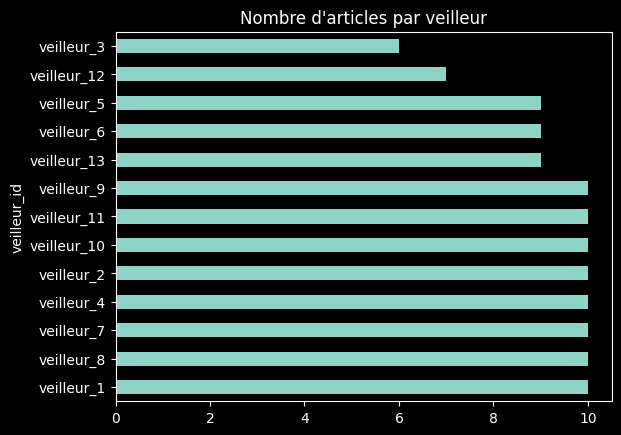

In [67]:
check_attribution(attributions_df_premium)

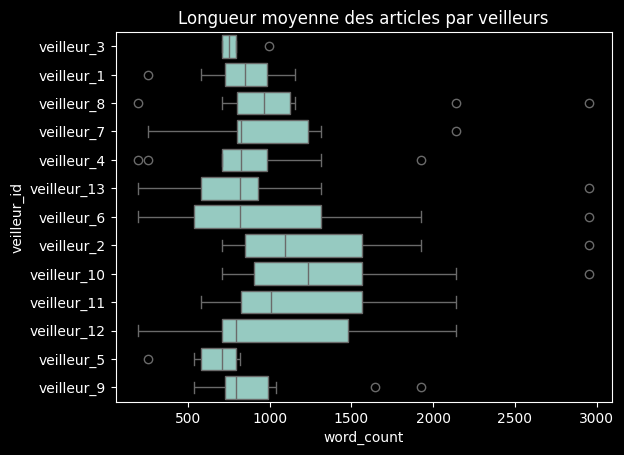

In [68]:
check_attribution(attributions_df_premium, plot="boxplot_veilleurs")

In [69]:
attributions_df_premium_sorted = attributions_df_premium.sort_values(by="veilleur_id").reset_index(drop=True)

In [70]:
# Sauvegarde en csv
attributions_df_premium_sorted[["veilleur_id", "title", "nom_fichier"]].to_csv("attribution_articles_veilleurs_pack_premium_09072025.csv")

In [71]:
# Création des dossiers par veilleurs
raw_file_path = "C:/Users/aurel/Documents/Pro/ClimatMedias/Methodo_presse/20260612_Factiva_extract"

# Répertoire de destination
output_base_dir = "articles_veilleurs"
os.makedirs(output_base_dir, exist_ok=True)

# Copier les fichiers pour chaque veilleur
for veilleur_id, group in attributions_df_premium.groupby("veilleur_id"):
    veilleur_dir = os.path.join(output_base_dir, veilleur_id)
    veilleur_premium_dir = os.path.join(veilleur_dir, 'pack_premium')
    os.makedirs(veilleur_premium_dir, exist_ok=True)

    for _, row in group.iterrows():
        source_path = str(row["nom_fichier"]+".pdf")
        if os.path.exists(os.path.join(raw_file_path, source_path)):
            shutil.copy(os.path.join(raw_file_path, source_path), veilleur_premium_dir)
        else:
            print(f"⚠️ Fichier non trouvé : {source_path}")